In [1]:
#automatic fitting of geometric parameters in single script.
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import optimize
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.interpolate import griddata
from scipy.ndimage import interpolation
from matplotlib.colors import hsv_to_rgb
from skimage.restoration import unwrap_phase
from mpl_toolkits.axes_grid1 import AxesGrid

In [3]:
folder = 'D:/4D-STEM Data/Merlin-NUS/MoS2/infocus/9/'
dat4d = np.load(folder+'data.npy')
pacbed = np.average(dat4d, axis=(0,1))
#load the gain data, and identify the dead and hotpixels.
gain = np.load(folder + "merlin gain.npy")

Text(0.5, 1.0, 'position averaged CBED')

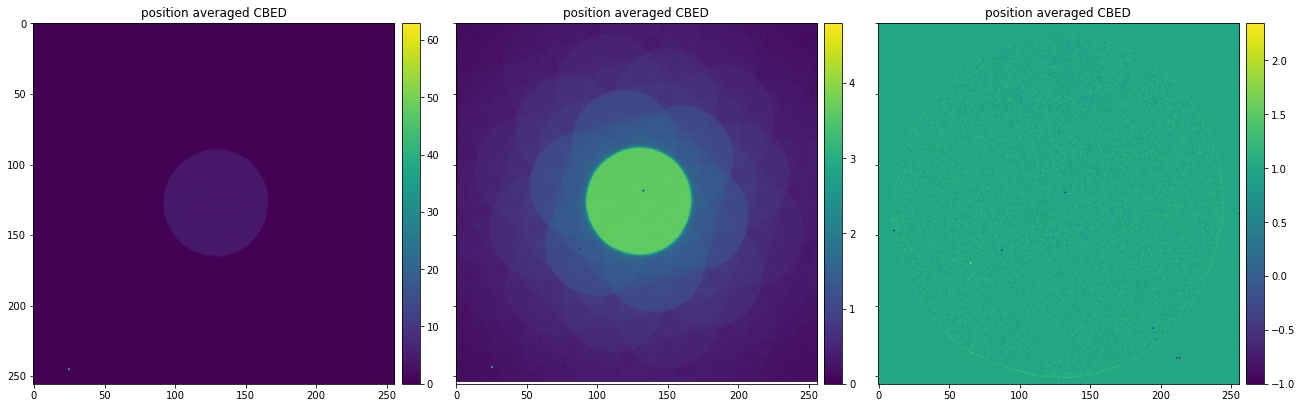

In [4]:
fig =plt.figure(1, figsize=(75, 25))
grid=AxesGrid(fig, 236, nrows_ncols=(1,3),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(pacbed, cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("position averaged CBED")
im=grid[1].imshow(np.log10(pacbed*1000+1.0)[1:], cmap=plt.cm.viridis)
grid.cbar_axes[1].colorbar(im)
grid[1].set_title("position averaged CBED")
im=grid[2].imshow(gain, cmap=plt.cm.viridis)
grid.cbar_axes[2].colorbar(im)
grid[2].set_title("position averaged CBED")

In [5]:
#deal the hot-pixel and dead pixel first.
hotpix = np.where(pacbed>np.average(pacbed)*20)
dat4d[:,:,hotpix[0],hotpix[1]] = 0
gain[hotpix] = 1e-3;
deadpix = np.where(gain<=0)
gain[deadpix] = 1e-3
dat4d[:,:,deadpix[0], deadpix[1]] = 0
#binning the 4D-STEM dataset and gain
gain = (gain[::2, ::2]+gain[1::2, ::2]+gain[::2, 1::2]+gain[1::2, 1::2])/4
dat4d = dat4d[:,:,::2,::2]+dat4d[:,:,1::2,::2]+dat4d[:,:,::2,1::2]+dat4d[:,:,1::2,1::2]
#make the normalization.
dat4d =dat4d/gain

Text(0.5, 1.0, 'position averaged CBED')

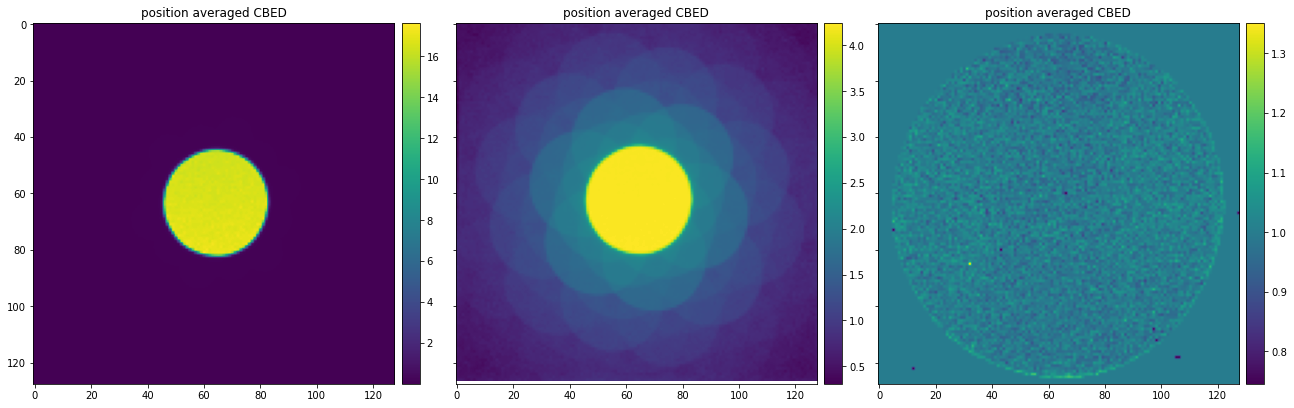

In [6]:
#generate the new PACBED and new gain.
pacbed = np.average(dat4d, axis=(0,1))
fig =plt.figure(1, figsize=(75, 25))
grid=AxesGrid(fig, 236, nrows_ncols=(1,3),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(pacbed, cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("position averaged CBED")
im=grid[1].imshow(np.log10(pacbed*1000+1.0)[1:], cmap=plt.cm.viridis)
grid.cbar_axes[1].colorbar(im)
grid[1].set_title("position averaged CBED")
im=grid[2].imshow(gain, cmap=plt.cm.viridis)
grid.cbar_axes[2].colorbar(im)
grid[2].set_title("position averaged CBED")

In [7]:
np.save(folder + "ndata.npy", dat4d)

Text(0.5, 1.0, 'constrained evolution of beam current')

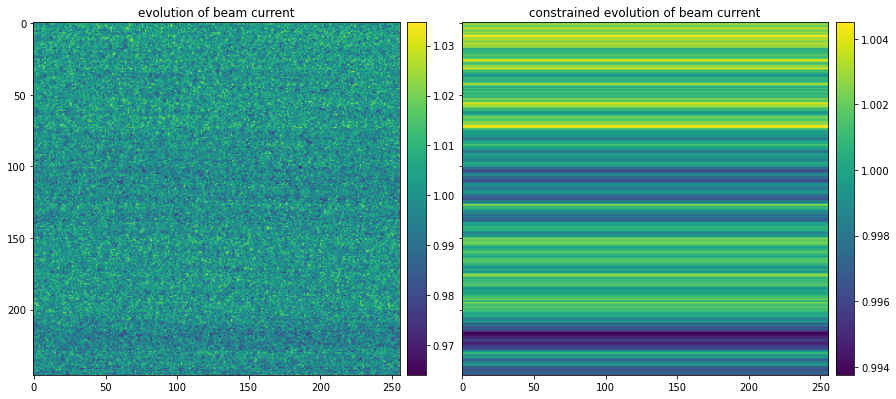

In [8]:
evolution = np.sum(dat4d, axis = (2, 3))
evolution = evolution/np.average(evolution)
#apply line constraint to the evolution for better initialization.
levolution = np.tile(np.average(evolution, axis= 1), (evolution.shape[1], 1)).T
fig =plt.figure(1, figsize=(50, 25))
grid=AxesGrid(fig, 236, nrows_ncols=(1,2),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(evolution, cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("evolution of beam current")
im=grid[1].imshow(levolution, cmap=plt.cm.viridis)
grid.cbar_axes[1].colorbar(im)
grid[1].set_title("constrained evolution of beam current")

In [9]:
np.save(folder + "evolution.npy", np.float32(evolution))
np.save(folder + "line evolution.npy", np.float32(levolution))

In [10]:
np.save(folder + "udata.npy", np.around(dat4d).astype(np.uint8))